In [6]:
# Here's a list of some necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv("Mall_Customers.csv")


In [8]:
df_raw =  pd.read_csv("Mall_Customers.csv")

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# Perform one-hot encoding on the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

# Display the resulting DataFrame
print(df_encoded)


     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0            False         True  
1            False         True  
2             True        False  
3             True        False  
4            

In [14]:
dff = df_encoded[['Gender_Female','Gender_Male']]

In [15]:
dff

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
195,True,False
196,True,False
197,False,True
198,False,True


In [16]:
# Convert True/False to 1s and 0s
dff=dff.replace({'True': True, 'False': False}).astype(int)

# Display the resulting DataFrame
print(dff)

     Gender_Female  Gender_Male
0                0            1
1                0            1
2                1            0
3                1            0
4                1            0
..             ...          ...
195              1            0
196              1            0
197              0            1
198              0            1
199              0            1

[200 rows x 2 columns]


In [17]:
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dff], axis=1)

In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


In [19]:
columns  = ["Gender","Gender_Male"]
df.drop(columns= columns, inplace=True)

In [20]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [21]:
df.rename(columns={'Gender_Female':"Sex"},inplace=True)

In [22]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [23]:
df.drop('CustomerID', axis=1,inplace=True)
df_raw.drop('CustomerID', axis=1,inplace=True)

In [24]:
df

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [25]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Sex
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

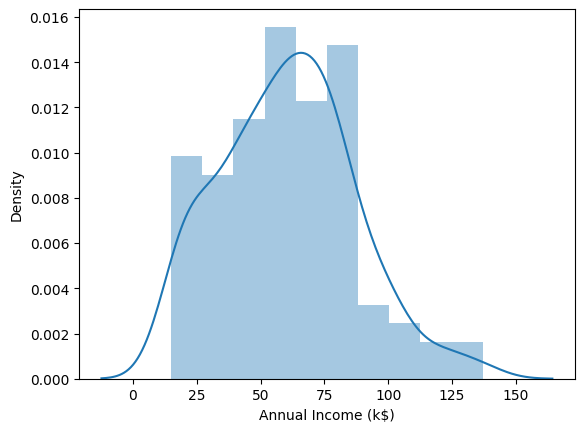

In [26]:
 sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

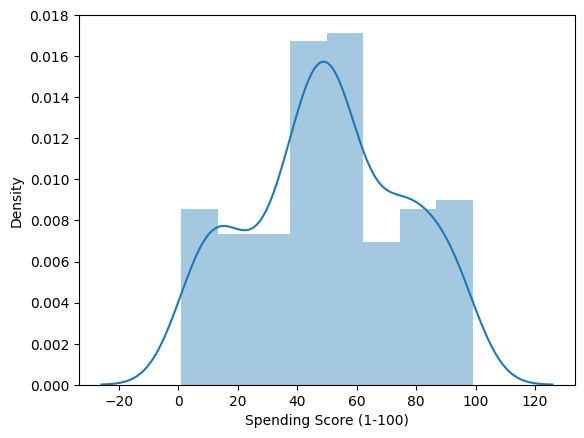

In [27]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: xlabel='Sex', ylabel='Density'>

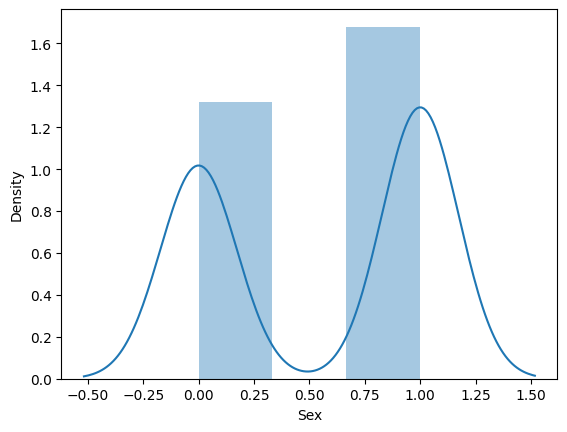

In [28]:
sns.distplot(df['Sex'])

<Axes: xlabel='Age', ylabel='Density'>

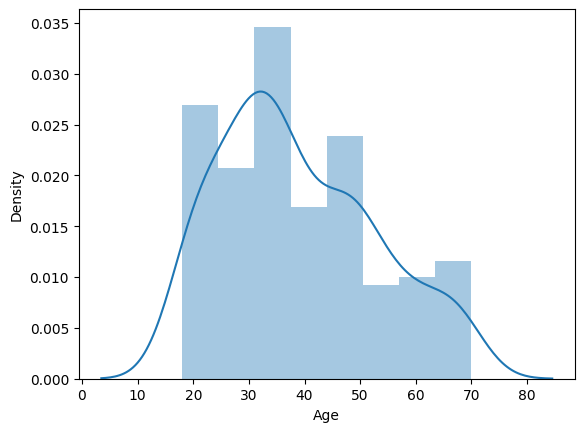

In [29]:
sns.distplot(df['Age'])

In [30]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Sex'], dtype='object')

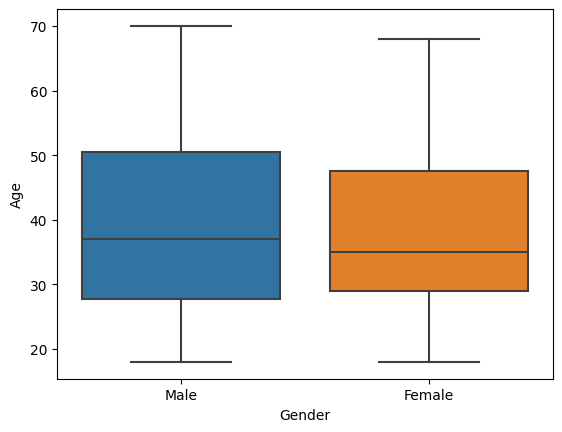

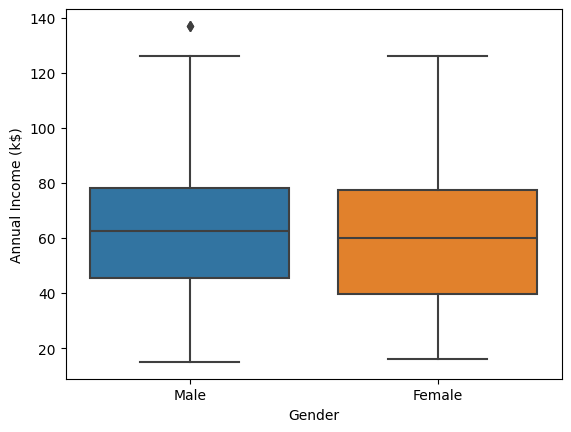

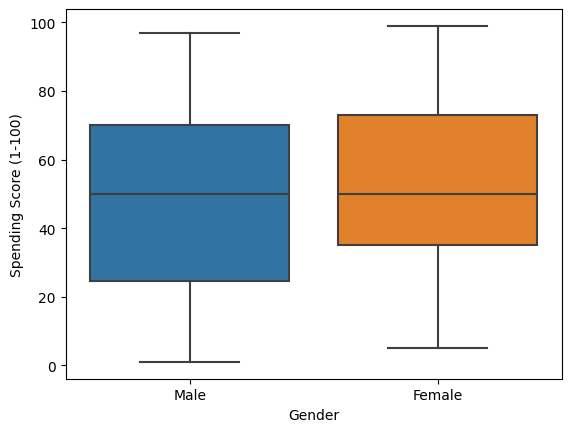

In [31]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df_raw, x='Gender', y=df[i])

In [32]:
df_raw['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

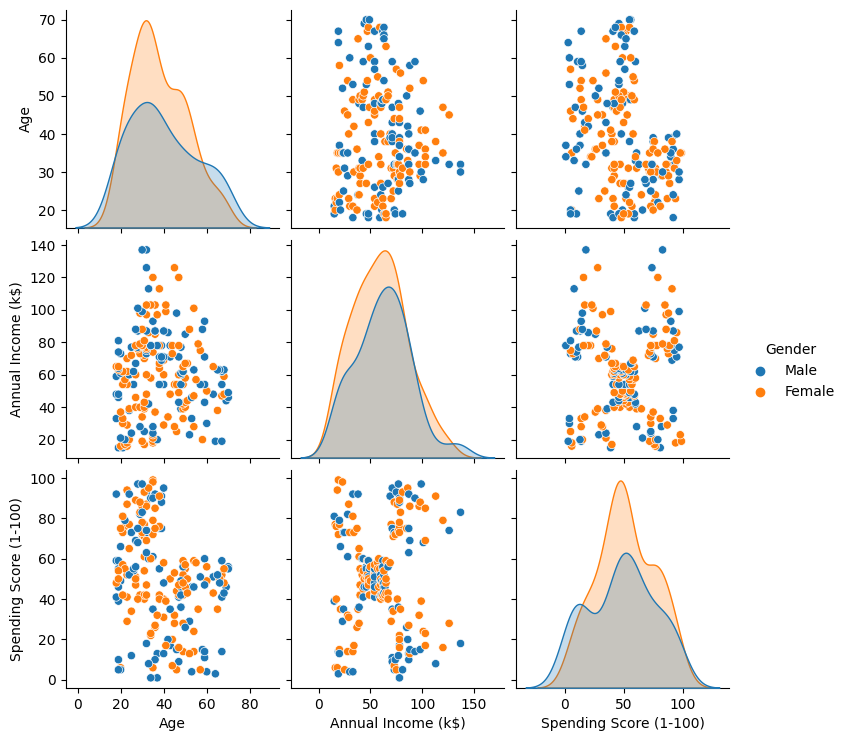

In [33]:
sns.pairplot(df_raw,hue = 'Gender')

In [34]:
result = df_raw.groupby('Gender').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

print(result)


   Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  Female  38.098214           59.250000               51.526786
1    Male  39.806818           62.227273               48.511364


In [35]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Sex
Age,1.000000,-0.012398,-0.327227,-0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109
Sex,-0.060867,-0.056410,0.058109,1.000000


<Axes: >

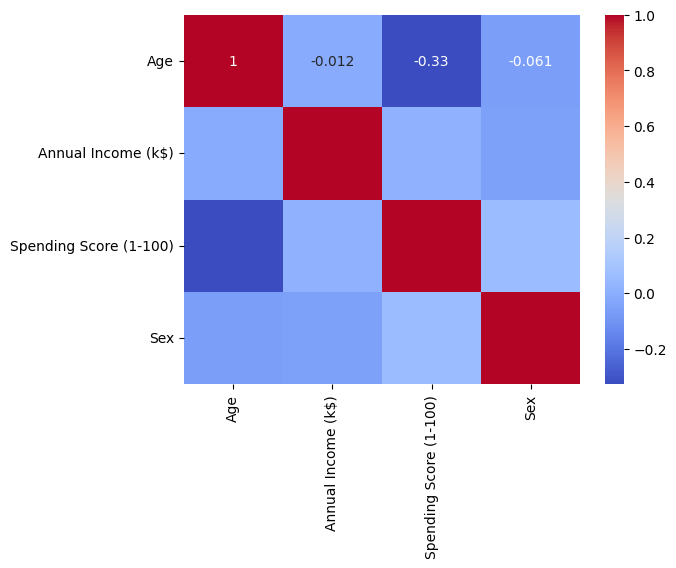

In [36]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm' )

clutering univariate, bivariate , multivariate 

In [37]:
fisrt_clustering = KMeans(n_clusters=3)

In [38]:
fisrt_clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [39]:
fisrt_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [40]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [41]:
df['Annual Income (k$)']= fisrt_clustering.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,1,39,0
1,21,1,81,0
2,20,1,6,1
3,23,1,77,1
4,31,1,40,1


In [42]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
0    90
1    74
2    36
Name: count, dtype: int64

In [43]:
fisrt_clustering.inertia_

23517.33093093093

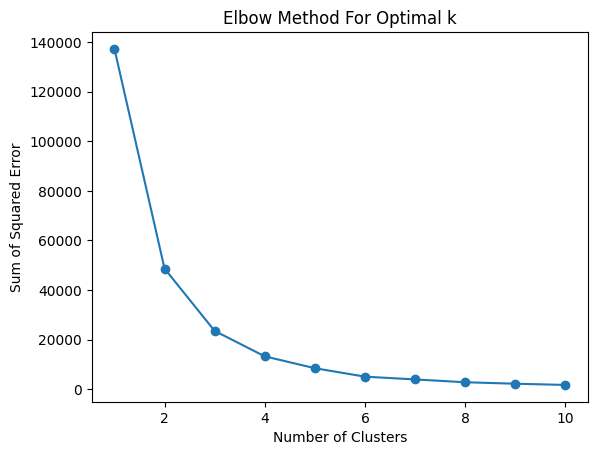

In [44]:
inertia_scores = []
# Loop over different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_raw[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

# Plotting the inertia scores
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()


In [45]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3955.256654456655,
 2822.4996947496966,
 2229.5897047397048,
 1743.4772727272739]

In [46]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Sex'], dtype='object')

In [47]:
df.groupby('Annual Income (k$)')[['Age','Annual Income (k$)' ,'Spending Score (1-100)', 'Sex']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Sex
Annual Income (k$),,,,
0,38.722222,0.0,50.000000,0.544444
1,39.500000,1.0,50.229730,0.608108
2,37.833333,2.0,50.638889,0.500000


In [48]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [49]:
second_clustering = KMeans(n_clusters= 5)

In [50]:
second_clustering.fit(df_raw[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [51]:
df["spending and income cluster"] = second_clustering.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex,spending and income cluster
0,19,1,39,0,4
1,21,1,81,0,2
2,20,1,6,1,4
3,23,1,77,1,2
4,31,1,40,1,4


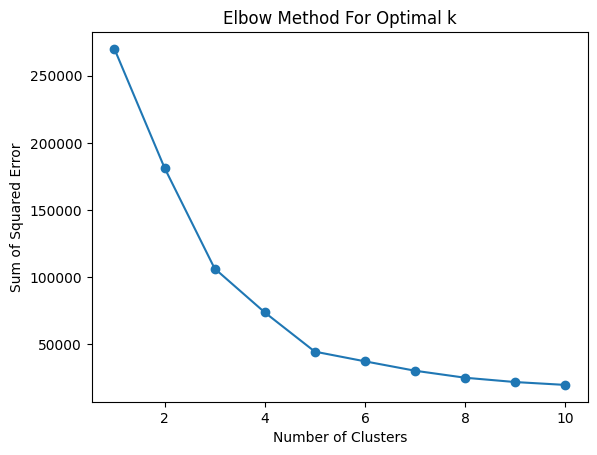

In [52]:
inertia_scores2 = []
# Loop over different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_raw[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)

# Plotting the inertia scores
plt.plot(range(1, 11), inertia_scores2, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

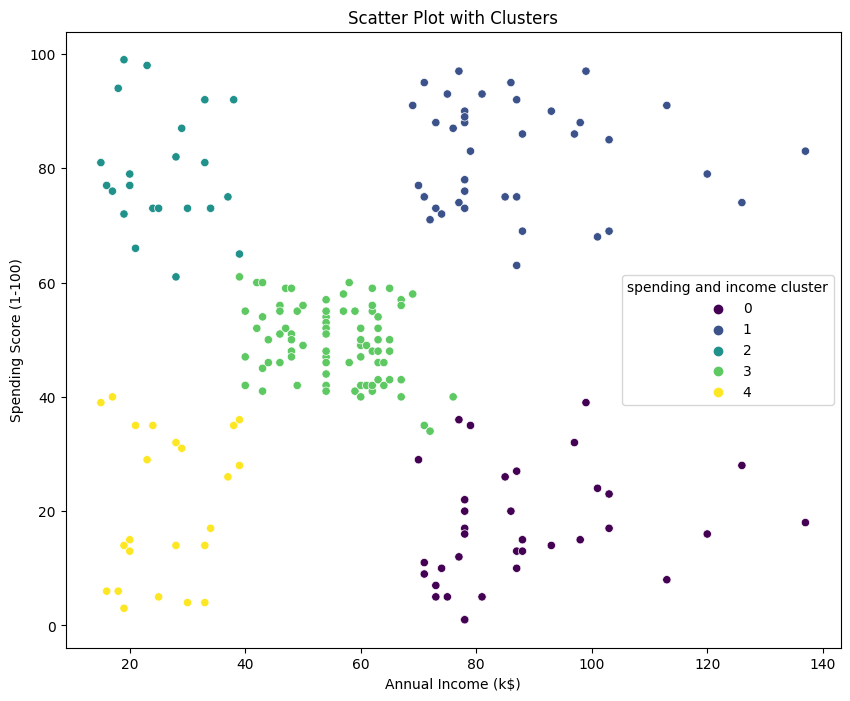

In [53]:
#sns.scatterplot(data=df_raw,x='Annual Income (k$)',y='Spending Score (1-100)',hue ="spending and income cluster", palette = 'tab10' )
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=df['spending and income cluster'], data=df_raw, palette='viridis')
plt.title('Scatter Plot with Clusters')
plt.show()


In [54]:
second_clustering.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

In [55]:
center = pd.DataFrame(second_clustering.cluster_centers_)

In [56]:
center

,0,1
0,88.200000,17.114286
1,86.538462,82.128205
2,25.727273,79.363636
3,55.296296,49.518519
4,26.304348,20.913043


In [57]:
center.columns = ['x','y']
center

,x,y
0,88.200000,17.114286
1,86.538462,82.128205
2,25.727273,79.363636
3,55.296296,49.518519
4,26.304348,20.913043


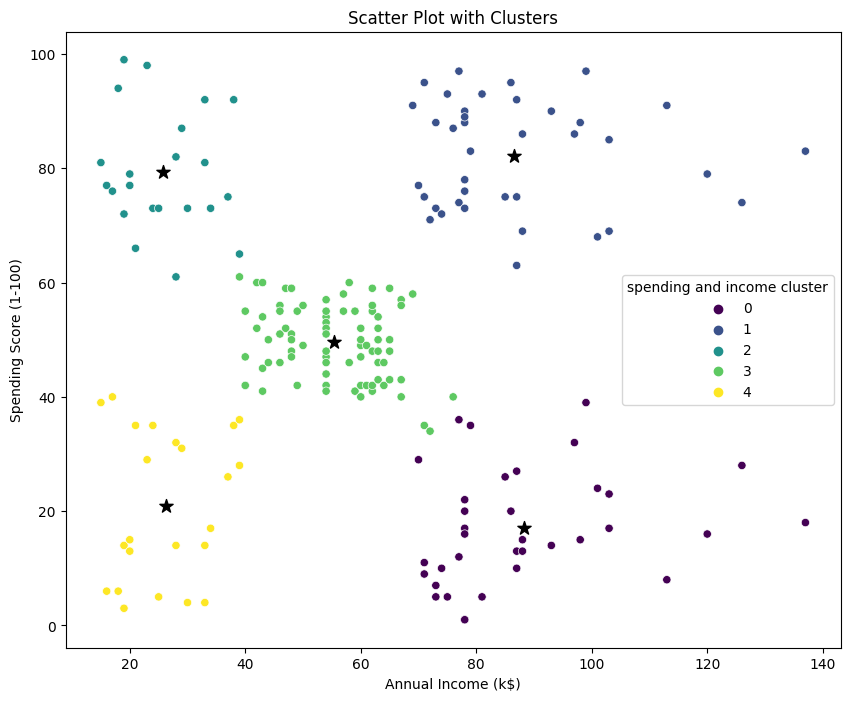

In [58]:
#sns.scatterplot(data=df_raw,x='Annual Income (k$)',y='Spending Score (1-100)',hue ="spending and income cluster", palette = 'tab10' )
plt.figure(figsize=(10, 8))
plt.scatter(x = center['x'],y = center['y'],s = 100, c='Black',marker = '*')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=df['spending and income cluster'], data=df_raw, palette='viridis')
plt.title('Scatter Plot with Clusters')
plt.show()


In [59]:
pd.crosstab(df['spending and income cluster'],df_raw['Gender'],normalize="index")

Gender,Female,Male
spending and income cluster,,
0,0.457143,0.542857
1,0.538462,0.461538
2,0.590909,0.409091
3,0.592593,0.407407
4,0.608696,0.391304


In [60]:
df.groupby('spending and income cluster')[['Age','Annual Income (k$)' ,'Spending Score (1-100)', 'Sex']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Sex
spending and income cluster,,,,
0,41.114286,1.028571,17.114286,0.457143
1,32.692308,0.923077,82.128205,0.538462
2,25.272727,1.000000,79.363636,0.590909
3,42.716049,0.358025,49.518519,0.592593
4,45.217391,1.000000,20.913043,0.608696


In [61]:
#multivariable clustering 

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
df

,Age,Annual Income (k$),Spending Score (1-100),Sex,spending and income cluster
0,19,1,39,0,4
1,21,1,81,0,2
2,20,1,6,1,4
3,23,1,77,1,2
4,31,1,40,1,4
...,...,...,...,...,...
195,35,2,79,1,1
196,45,2,28,1,0
197,32,2,74,0,1
198,32,2,18,0,0


In [64]:
df.drop(columns= "spending and income cluster", inplace=True)

In [65]:
df['Annual Income (k$)'] = df_raw['Annual Income (k$)']

In [66]:
df

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [67]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [68]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526],
       [-1.06573534, -1.54815205,  1.04041783,  0.88640526],
       [-0.13276838, -1.54815205, -1.44416206, -1.12815215],
       [-1.20926872, -1.54815205,  1.11806095, -1.12815215],
       [-0.27630176, -1.

In [69]:
df_scaled = pd.DataFrame(df_scaled)

In [70]:
df_scaled

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405
196,0.441365,2.497807,-0.861839,0.886405
197,-0.491602,2.497807,0.923953,-1.128152
198,-0.491602,2.917671,-1.250054,-1.128152


In [71]:
thrd_clustering = KMeans()

thrd_clustering.fit(df_scaled)

KMeans()

In [72]:
df["cluster"] = thrd_clustering.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex,cluster
0,19,15,39,0,7
1,21,15,81,0,7
2,20,16,6,1,6
3,23,16,77,1,6
4,31,17,40,1,6


In [73]:
inertia_scores3 = []
# Loop over different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    inertia_scores3.append(kmeans.inertia_)

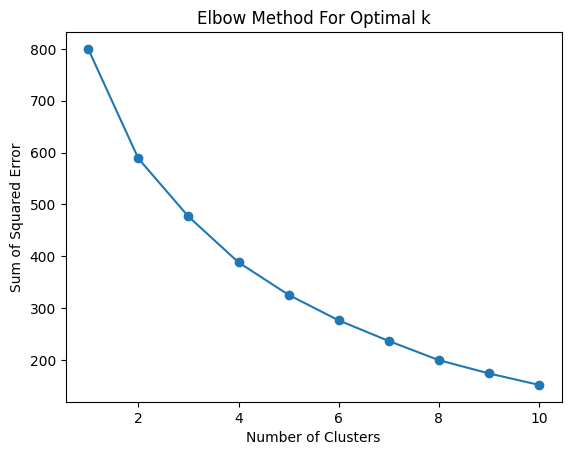

In [74]:
# Plotting the inertia scores
plt.plot(range(1, 11), inertia_scores3, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()